In [105]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [107]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [109]:
NUM_CLASSES = 8

# Dataset reading

In [111]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [112]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [115]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [116]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │              88 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [118]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [120]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
35/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1465 - loss: 2.0560
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1502 - loss: 2.0501 - val_accuracy: 0.2371 - val_loss: 1.9250
Epoch 2/1000
31/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2115 - loss: 1.9466 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2151 - loss: 1.9439 - val_accuracy: 0.2863 - val_loss: 1.8478
Epoch 3/1000
31/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2511 - loss: 1.8998 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2538 - loss: 1.8934 - val_accuracy: 0.3557 - val_loss: 1.7697
Epoch 4/1000
34/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2528 - loss: 1.8489 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras

In [121]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8932 - loss: 0.3670 


In [122]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [123]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[2.28616834e-01 6.85526012e-03 3.59172445e-05 2.20651127e-05
 7.49802232e-01 1.43938055e-02 2.73380341e-04 6.35220999e-07]
4


# Confusion matrix

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


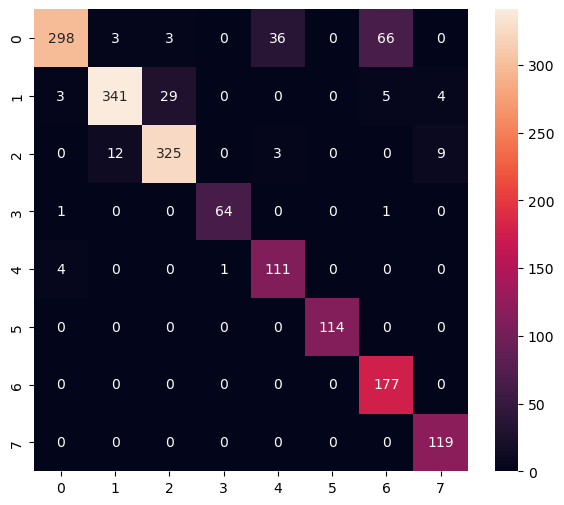

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.73      0.84       406
           1       0.96      0.89      0.92       382
           2       0.91      0.93      0.92       349
           3       0.98      0.97      0.98        66
           4       0.74      0.96      0.83       116
           5       1.00      1.00      1.00       114
           6       0.71      1.00      0.83       177
           7       0.90      1.00      0.95       119

    accuracy                           0.90      1729
   macro avg       0.90      0.94      0.91      1729
weighted avg       0.91      0.90      0.90      1729



In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [127]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [128]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\asus\AppData\Local\Temp\tmpmntncy3t\assets


INFO:tensorflow:Assets written to: C:\Users\asus\AppData\Local\Temp\tmpmntncy3t\assets


Saved artifact at 'C:\Users\asus\AppData\Local\Temp\tmpmntncy3t'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  2723099350736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2723099352272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2723099351120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2723099349776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2723099348816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2723099360720: TensorSpec(shape=(), dtype=tf.resource, name=None)


6732

# Inference test

In [130]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [131]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [132]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [133]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1 ms


In [134]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.2861670e-01 6.8552471e-03 3.5917179e-05 2.2065071e-05 7.4980229e-01
 1.4393786e-02 2.7337982e-04 6.3522282e-07]
4
